In [1]:
from genetic_algorithm import *
import re
import json
import numpy as np
from numpy.random import default_rng
from collections import Counter
import copy
import matplotlib.pyplot as plt
# from itertools import product

## hexadecimal generator

In [2]:
nr_of_input = 3
nr_of_actions = 3
nr_of_inner = 3
nr_of_genes = 16
nr_individuals = 4

individuals = generate_initial_genomes_for_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner)

In [3]:
## world size
world_size_x = 128
world_size_y = 128

rng = default_rng()
x = rng.choice(world_size_x, size=nr_individuals, replace=False)
y = rng.choice(world_size_y, size=nr_individuals, replace=False)


In [4]:
individuals_sum_dup = sum_duplicated_neurons(individuals)

## initial brain and position generator

In [5]:
initial_dic_of_output_neurons = {}

## sum duplicates
individuals_sum_dup = sum_duplicated_neurons(individuals)

## brain generator
for individual in individuals_sum_dup:
    
    ## init brain neuron generator
    print(individual)
    ## preprocessing
    edges = individuals_sum_dup[individual]
    edges = [tuple(edges[i]) for i in edges]
    edges_no_weight = [i[:-1] for i in edges]
    
    G = nx.MultiDiGraph()
    G.add_edges_from(edges)
    
    out_list = list(set([i[1] for i in edges if 'out' in i[1]]))
    init_list = list(set([i[0] for i in edges if 'in' in i[0]]))

    # generate dict of paths
    dic_of_paths = generate_dict_of_paths(out_list, init_list, G)

    lis = filtered_neurons_paths(dic_of_paths)
    
    dic = append_weight_to_neurons_in_path(lis, edges_no_weight, edges)
    print(dic)
    
        
        

#     print(dic)
    print()

0
{'out2': {'mid1': 0.9954491963281817, 'out2': {'in1': 3.519853502212727, 'in0': 0.13074927514115672, 'mid1': -2.5820235006867085}}, 'out1': {'mid1': 0.9954491963281817, 'out1': {'mid1': -0.22499618495345644}}, 'out0': {'mid1': 0.9954491963281817, 'out0': {'mid1': 2.163039829085915, 'in1': 3.9770486799938958}}}

1
{'out2': {'mid1': -0.9980422446657246, 'mid2': {'mid1': -2.5434457500381504, 'in2': -1.1937128032962, 'in0': 0.8477338623531208}, 'out2': {'mid2': 2.170364718449565}}, 'out1': {'mid0': {'mid1': 1.115580650083931, 'in0': 0.07288264916831985, 'in1': 3.89842820082405}, 'mid1': {'in0': -3.464062261559591, 'mid2': 0.3714939722264612}, 'mid2': -0.33280465141384813, 'out1': {'mid0': 0.11829696322295132}}, 'out0': {'mid0': {'mid1': 1.115580650083931, 'in0': 0.07288264916831985, 'in1': 3.89842820082405}, 'mid1': {'in0': -3.464062261559591, 'mid2': 0.3714939722264612}, 'mid2': {'mid1': -2.5434457500381504, 'in2': -1.1937128032962, 'in0': 0.8477338623531208}, 'out0': {'mid0': 3.4039981

In [26]:
def generate_dict_of_paths(out_list, init_list, G):
    '''generate list of paths lead for output neurons'''
    
    selfloop = list(nx.nodes_with_selfloops(G))
    dic_of_paths = {}
    for out in out_list:
        dic_of_paths[out] = []
        for inp in init_list:
            for path in nx.all_simple_paths(G, inp, out):
                if path:
                    ind = [i_nr for i_nr, i in enumerate(path) if i in selfloop][::-1]
                    if ind:
                        for i in ind:
                            path.insert(i+1, path[i])
                    dic_of_paths[out].append(path)
               
    return dic_of_paths

In [27]:
G = nx.MultiDiGraph()
G.add_edges_from(edges)

out_list = list(set([i[1] for i in edges if 'out' in i[1]]))
init_list = list(set([i[0] for i in edges if 'in' in i[0]]))

# generate dict of paths
dic_of_paths = generate_dict_of_paths(out_list, init_list, G)

dic_of_paths

{'out2': [['in0', 'mid2', 'mid2', 'out2'],
  ['in1', 'mid0', 'mid0', 'out2'],
  ['in1', 'out2'],
  ['in2', 'mid0', 'mid0', 'out2']],
 'out0': [['in0', 'mid2', 'mid2', 'out0'], ['in2', 'out0']],
 'out1': [['in0', 'mid2', 'mid2', 'out1'], ['in2', 'out1']]}

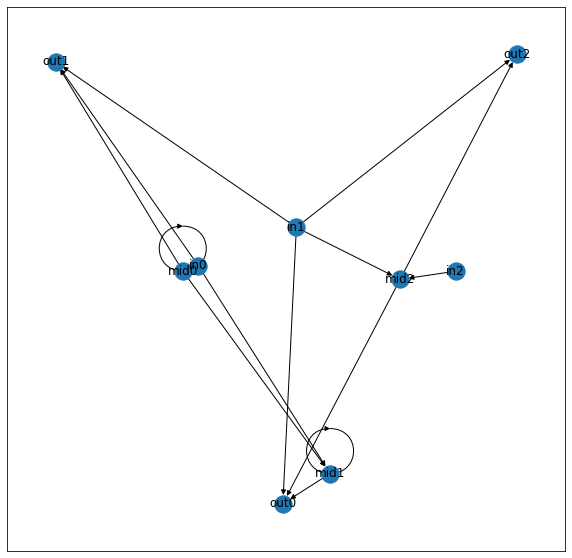

In [57]:
plt.figure(figsize=[10,10])
nx.draw_networkx(G)
nx.spring_layout(G, iterations=1000)
plt.show()

In [75]:
l = [1,2,3,4]
m = [3,4]

ind = [i_nr for i_nr, i in enumerate(l) if i in m][::-1]
l = [l.insert(i+1, l[i]) for i in ind]

[3, 2]

In [76]:
[l.insert(i+1, l[i]) for i in ind]
    
l

[1, 2, 3, 3, 4, 4]

1


In [20]:
for i in dic:
    print(i)
    print(dic[i])
    print()

out2
{'mid0': 0.9901939361952762, 'mid1': -0.8966706992163574, 'mid2': {'in2': -0.6113840988860064, 'mid0': 3.5628261864794752, 'mid1': 3.4666259728368685}, 'out2': {'mid2': 3.6171524492598808}}

out1
{'mid0': 0.9901939361952762, 'mid1': -0.8966706992163574, 'mid2': {'in2': -0.6113840988860064, 'mid0': 3.5628261864794752, 'mid1': 3.4666259728368685}, 'out1': {'in0': -3.1268731878528917, 'in1': 0.03601403937128033, 'mid0': -3.0725469250724857, 'mid2': -3.168014649778727, 'in2': 0.36661071265069434}}



In [7]:
dic['out1']

{'mid0': 0.9901939361952762,
 'mid1': -0.8966706992163574,
 'mid2': {'in2': -0.6113840988860064,
  'mid0': 3.5628261864794752,
  'mid1': 3.4666259728368685},
 'out1': {'in0': -3.1268731878528917,
  'in1': 0.03601403937128033,
  'mid0': -3.0725469250724857,
  'mid2': -3.168014649778727,
  'in2': 0.36661071265069434}}

In [8]:
initial_dic_of_output_neurons = {}

## sum duplicates
individuals_sum_dup = sum_duplicated_neurons(individuals)

## remove self loops
individuals_sum_dup_no_self_loop = remove_self_loop(individuals_sum_dup)

## brain generator
for individual in individuals_sum_dup_no_self_loop:
    
    ## init brain neuron generator
    
    ## preprocessing
    edges = individuals_sum_dup_no_self_loop[individual]
    edges = [tuple(edges[i]) for i in edges]

    remove_mid_with_no_predecessor(edges) 
    dic = weight_sum_preprocessing(edges)

    ## calculate weight sum
    mid_to_weight(dic)
    out_to_weight(dic)
       
    dic = {k:v for k, v in dic.items() if 'out' in k}    
    
    initial_dic_of_output_neurons[individual] = {}
    initial_dic_of_output_neurons[individual]['output'] = dic
    
    ## position
#     initial_dic_of_output_neurons[individual]['position'] = {}
#     initial_dic_of_output_neurons[individual]['position']['x'] = x[individual]
#     initial_dic_of_output_neurons[individual]['position']['y'] = y[individual] 
    
    ## position history
    initial_dic_of_output_neurons[individual]['history_position'] = [(x[individual], y[individual])]

In [9]:
initial_dic_of_output_neurons

{0: {'output': {'out0': -0.9941392171560546,
   'out1': -0.3995677412004998,
   'out2': -0.559667317504093},
  'history_position': [(90, 1)]},
 1: {'output': {'out0': -0.07093210467435282,
   'out1': -0.4384494215569999,
   'out2': 0.5525715141627122},
  'history_position': [(23, 123)]},
 2: {'output': {'out0': 0.9984096476650253,
   'out1': 0.8128864397791226,
   'out2': 0.9895769484375675},
  'history_position': [(119, 73)]},
 3: {'output': {'out1': -0.9999982503498028, 'out2': 0.9998047532689923},
  'history_position': [(121, 93)]}}

In [10]:
a = [(3, 0),(4,1),(5,2)]

In [11]:
def slope_intercept(x1,y1,x2,y2):
    a = (y2 - y1) / (x2 - x1)
    b = y1 - a * x1     
    return a,b

print(slope_intercept(3,0,2,1))

(-1.0, 3.0)


In [12]:
a

[(3, 0), (4, 1), (5, 2)]

In [13]:
if a[-2][0] == a[-1][0]:
    x = a[-1][0]
elif a[-2][0] > a[-1][0]:
    x = a[-2][0] + 1
elif a[-2][0] < a[-1][0]:
    x = a[-2][0] - 1
print(x)

3


In [14]:
a[-2][0]

4